In [1]:
import numpy as np

from commons import *
from dataset_loader import load_images, prepare_dataset
from IPython.display import display
import cv2
import pickle
import matplotlib.pyplot as plt
from keras.models import load_model


DOTS_SRC = 'hit-images-final2/dot'
TRACKS_SRC = 'hit-images-final2/line'
WORMS_SRC = 'hit-images-final2/worms'
ARTIFACTS_SRC = 'hit-images-final2/artefact'

DOTS_AC = 'cache/dots_100000.h5'
TRACKS_AC = 'cache/tracks_100000.h5'
WORMS_AC = 'cache/worms_100000.h5'
ARTIFACTS_AC = 'cache/artifacts_100000.h5'



dots_set =  prepare_dataset(load_images(DOTS_SRC))
worms_set =  prepare_dataset(load_images(WORMS_SRC))
tracks_set =  prepare_dataset(load_images(TRACKS_SRC))
artifacts_set =  prepare_dataset(load_images(ARTIFACTS_SRC))

dots_autoencoder = load_model(DOTS_AC)
worms_autoencoder = load_model(WORMS_AC)
tracks_autoencoder = load_model(TRACKS_AC)
artifacts_autoencoder = load_model(ARTIFACTS_AC)

on = {'dots': calc_similarity(dots_autoencoder, dots_set, tracks_set, worms_set, artifacts_set, cutoff_background=True),
      'worms': calc_similarity(worms_autoencoder, dots_set, tracks_set, worms_set, artifacts_set, cutoff_background=True),
      'tracks': calc_similarity(tracks_autoencoder, dots_set, tracks_set, worms_set, artifacts_set, cutoff_background=True),
      'artifacts': calc_similarity(artifacts_autoencoder, dots_set, tracks_set, worms_set, artifacts_set, cutoff_background=True)}

Channel dots, compare dots vs tracks, threshold: -11.195895362399126, fp/fn percent: 4.17004048582996 %


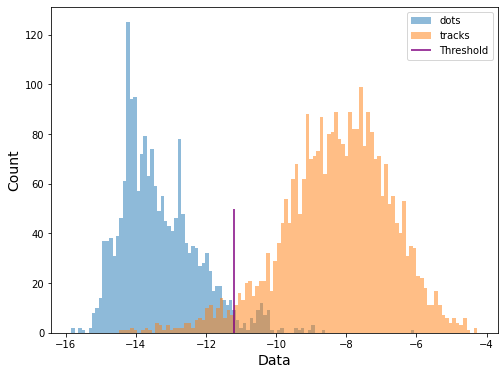

Channel dots, compare dots vs worms, threshold: -10.693129392157083, fp/fn percent: 2.952340784479123 %


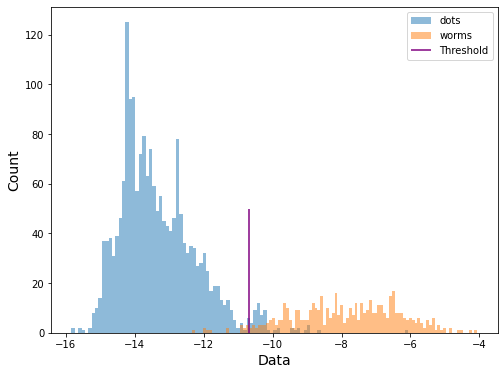

Channel dots, compare dots vs artifacts, threshold: -11.217422395899494, fp/fn percent: 4.244347481158271 %


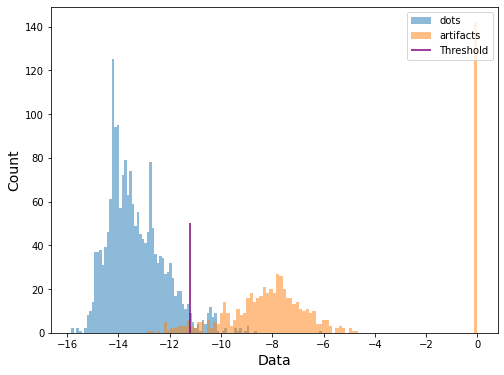

Channel tracks, compare tracks vs dots, threshold: -11.159547217411387, fp/fn percent: 47.08502024291498 %


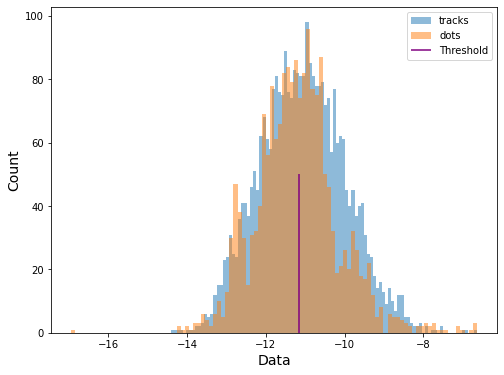

Channel tracks, compare tracks vs worms, threshold: -10.22787614691971, fp/fn percent: 22.15669755686605 %


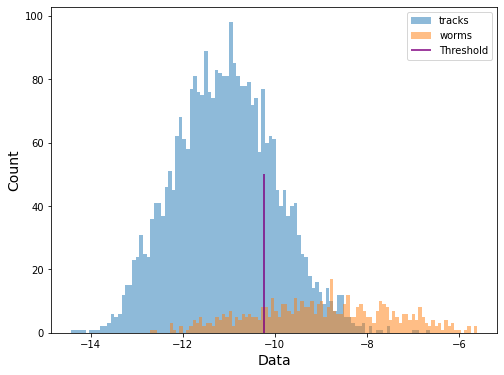

Channel tracks, compare tracks vs artifacts, threshold: -10.045001378983828, fp/fn percent: 17.48854756130423 %


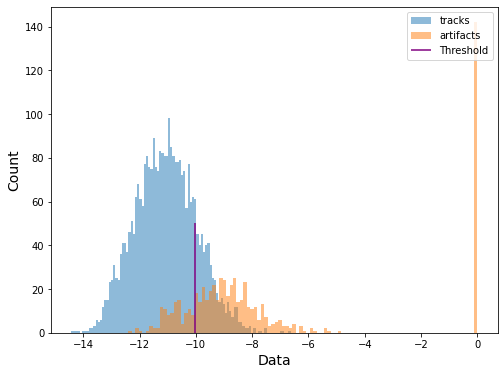

Channel worms, compare worms vs dots, threshold: -11.04559895880545, fp/fn percent: 43.10417545339519 %


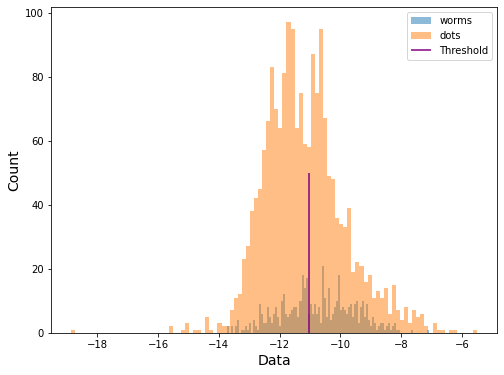

Channel worms, compare worms vs tracks, threshold: -10.348540764423873, fp/fn percent: 38.24768323504634 %


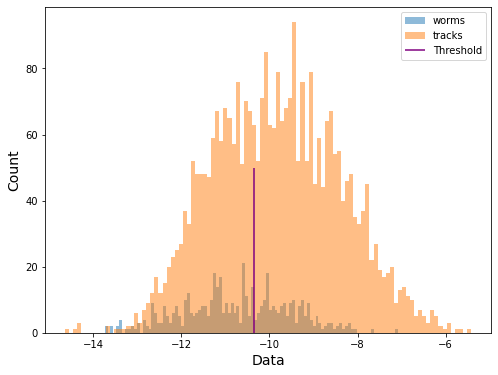

Channel worms, compare worms vs artifacts, threshold: -9.961975572960016, fp/fn percent: 27.408056042031525 %


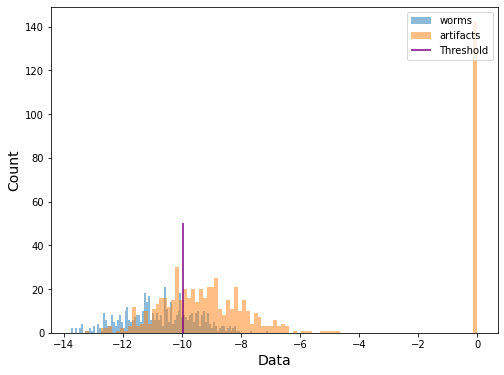

Channel artifacts, compare artifacts vs dots, threshold: -7.022262327740501, fp/fn percent: 46.41015470051567 %


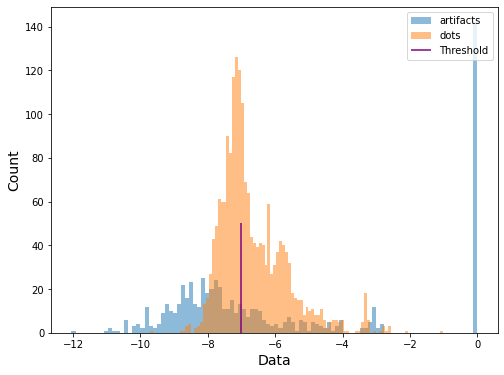

Channel artifacts, compare artifacts vs tracks, threshold: -7.3656490457257515, fp/fn percent: 47.85772029102668 %


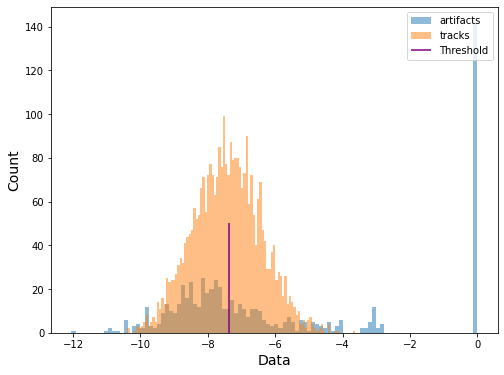

Channel artifacts, compare artifacts vs worms, threshold: -7.370179927280107, fp/fn percent: 47.54816112084063 %


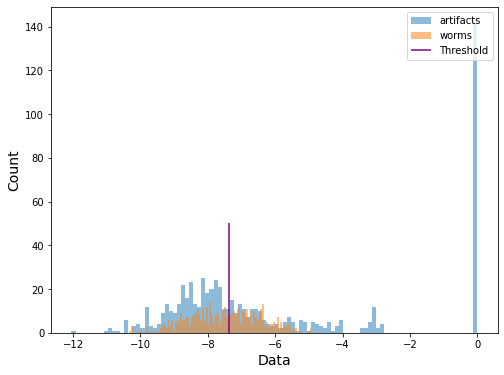

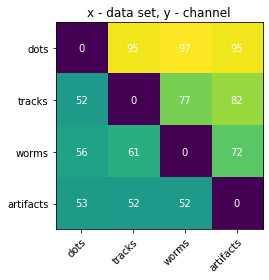

In [2]:
confusion_matrix(on)